In [1]:
import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
col = ['order', 'date', '1', '2', '3', '4', '5', '6', 'B']
n = [0, 1, 12, 13, 14, 15, 16, 17, 18]
book = openpyxl.load_workbook("lotto.xlsx")
sheet = book.active
startPos = 'B4'
endPos = 'T' + str(sheet.max_row)
data_range = sheet[startPos:endPos]
data = []
for row in range(len(data_range)-1, -1, -1):
    values = []
    for cell in n:
        values.append(data_range[row][cell].value)
    data.append(values)

In [15]:
df_lotto = pd.DataFrame(data, columns=col)
#print(df)
df_lotto['date'] = pd.to_datetime(df_lotto['date'])
#print(df['date'])

In [16]:
lotto = df_lotto[['1', '2', '3', '4', '5', '6']]
lottob = df_lotto[['1', '2', '3', '4', '5', '6', 'B']]
#print(lotto)
#print(lottob)

In [5]:
nlotto = np.array(lotto)

# total sum
nlotto_sum = np.sum(nlotto)
#print(nlotto_sum)

In [6]:
# avrage of each orders
nlotto_avg = np.average(nlotto, axis=1)
#print(nlotto_avg)
#df = pd.DataFrame(nlotto_avg)

In [7]:
#nlotto1g = np.array([lotto['1']+45])
#nlotto = np.hstack((nlotto, nlotto1.T))
#nlotto = np.concatenate((nlotto, nlotto1g.T), axis=1)

# difference of each numbers
nlotto_gap = np.diff(nlotto, axis=1)
df = pd.DataFrame(nlotto_gap)
print(nlotto_gap)

[[13  6  4  4  3]
 [ 4  8  4  7 10]
 [ 5  3  2  6  4]
 ...
 [ 1 10  3  1  1]
 [ 9  8  5  2  5]
 [11  1  8  5  7]]


In [10]:
# avrage of difference of each numbers
nlotto_gap_avg = np.average(np.array(nlotto_gap), axis=1)
df = pd.DataFrame(nlotto_gap_avg)

#print(df)

In [48]:
#print(df_lotto)
#df_selected = pd.DataFrame(data)
#df_selected.empty

for index, row in df_lotto.iterrows():
    #print(row)
    if row['1'] == 1:
        print(row)
    #if row['1'] == 1 or row['2'] == 1:
        #df_selected.append(df_lotto[index])
   #print(row['date'], row['1'])
#df_lotto.where(df_lotto['1'] == 10)

print(df_selected)


order                     11
date     2003-02-15 00:00:00
1                          1
2                          7
3                         36
4                         37
5                         41
6                         42
B                         14
Name: 10, dtype: object
order                     27
date     2003-06-07 00:00:00
1                          1
2                         20
3                         26
4                         28
5                         37
6                         43
B                         27
Name: 26, dtype: object
order                     29
date     2003-06-21 00:00:00
1                          1
2                          5
3                         13
4                         34
5                         39
6                         40
B                         11
Name: 28, dtype: object
order                     36
date     2003-08-09 00:00:00
1                          1
2                         10
3                         23


KeyError: 'date'

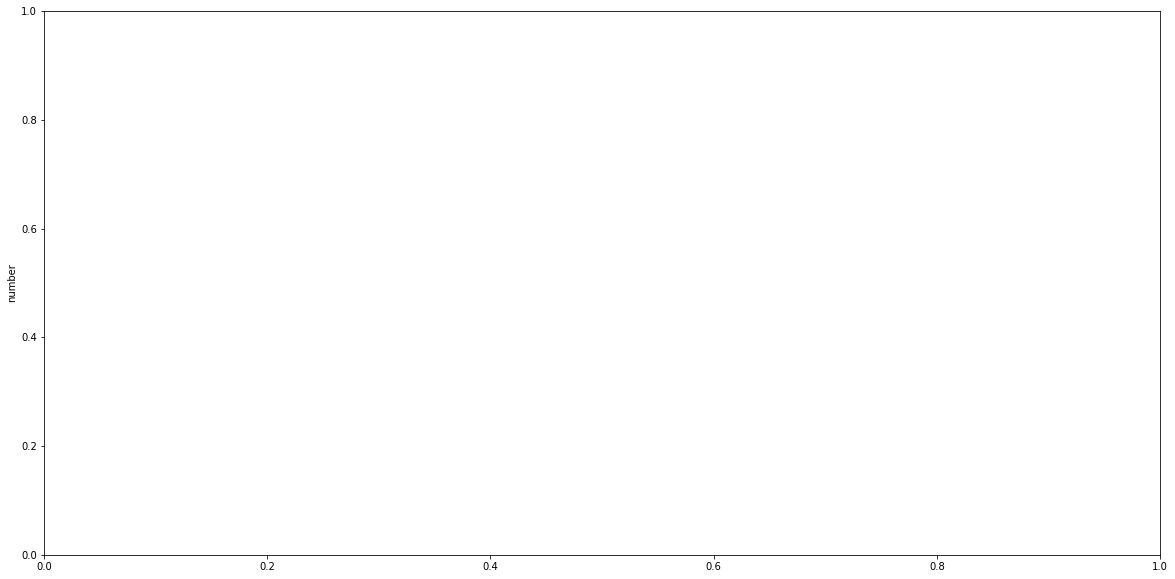

In [9]:
from matplotlib.widgets import Slider, Button, RadioButtons

plt.figure(figsize=(20,10))
plt.ylabel('number')
#plt.ylim(0, 46)
x_start = df['date'].values[0]
x_end = df['date'].values[-1]
print(x_start, x_end)

plt.axis([x_start, x_end, 0, 46])
plt.plot(df['date'], df['1'], '.')
'''
plt.plot(df['date'], df['2'], '.')
plt.plot(df['date'], df['3'], '.')
plt.plot(df['date'], df['4'], '.')
plt.plot(df['date'], df['5'], '.')
plt.plot(df['date'], df['6'], '.')
plt.plot(df['date'], df['B'], '.')
'''
plt.xticks(rotation='vertical')

axcolor = 'lightgoldenrodyellow'
#axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.2, 0, 0.65, 0.03], facecolor=axcolor)
#axamp = plt.axes(facecolor=axcolor)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=1)

def update(val):
    amp = samp.val
    freq = sfreq.val
    #l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()

samp.on_changed(update)

plt.show()

In [ ]:
print(df.columns)